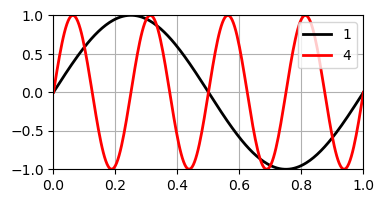

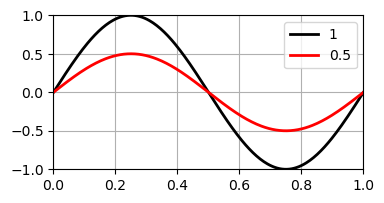

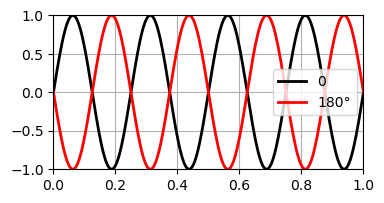

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sin(y1,y2,n,l1,l2, limx=(0,1)): 
    plt.figure(figsize=(4,2))
    plt.plot(n,y1,'k',lw=2,label=l1)
    plt.plot(n,y2,'r',lw=2,label=l2)
    plt.xlim(limx)
    plt.ylim((-1,1))
    plt.grid()    
    plt.legend()

N = 256
n = np.linspace(0,1,N)
f0 = 1 
f1 = 4 

# fréquence différentes
y1 = np.sin(n*2*np.pi*f0)
y2 = np.sin(n*2*np.pi*f1) 
plot_sin(y1,y2,n,f0,f1)

# amplitudes différentes
y1 = np.sin(n*2*np.pi*f0)
y2 = .5*np.sin(n*2*np.pi*f0) 
plot_sin(y1,y2,n,1,.5)

# phases différentes
y1 = np.sin(n*2*np.pi*f1)
y2 = np.sin(n*2*np.pi*f1 + 2*np.pi*180/360) 
plot_sin(y1,y2,n,0,"180°")




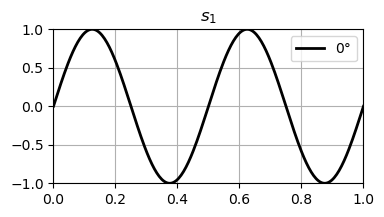

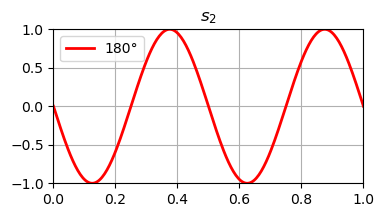

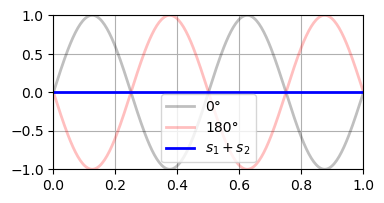

In [24]:
# importance de la phase 

# phases différentes
y1 = np.sin(n*2*np.pi*f1/2)
y2 = np.sin(n*2*np.pi*f1/2 + 2*np.pi*180/360) 
l1 = "0°"
l2 = "180°"

plt.figure(figsize=(4,2))
plt.plot(n,y1,'k',lw=2,label=l1)
plt.title(r"$s_1$")
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()    
plt.legend()

plt.figure(figsize=(4,2))
plt.plot(n,y2,'r',lw=2,label=l2)
plt.title(r"$s_2$")
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()    
plt.legend()

plt.figure(figsize=(4,2))
plt.plot(n,y1,'k',alpha = .25, lw=2,label=l1)
plt.plot(n,y2,'r',alpha = .25,lw=2,label=l2)
plt.plot(n,y1+y2,'b',lw=2,label=r"$s_1+s_2$")
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()    
plt.legend()

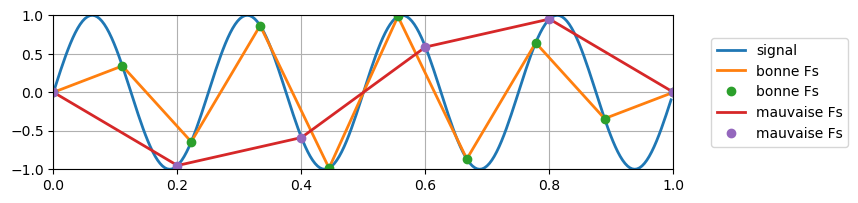

In [45]:
# importance fréquence d'échantillonnage
f = 4
n = np.arange(N)*1.0

# Fs différents
Fs  = [256,9,5]
tex = ["signal", "bonne Fs", "mauvaise Fs"] 
plt.figure(figsize=(8,2))
for ind in range(3):
    y = np.sin((n/Fs[ind])*2*np.pi*f)
    plt.plot(n/Fs[ind],y,lw=2,label=tex[ind])
    if ind > 0:
        plt.plot(n/Fs[ind],y,"o",label=tex[ind])
    plt.xlim((0,1))
    plt.ylim((-1,1))
    plt.grid()    
    plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))    

0.0031223898204109837
0.008433806340006754


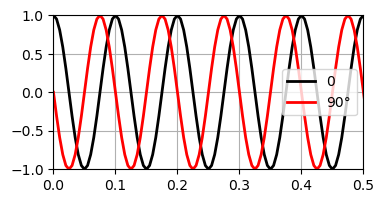

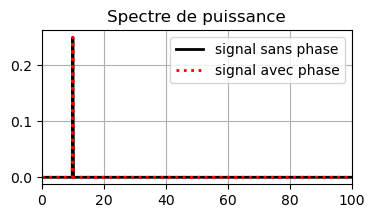

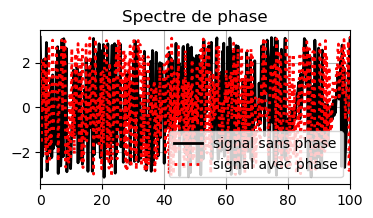

In [106]:
# Spectre de puissance et de phase 
Fs = 200
N = 1000
n = np.arange(N) 
f1 = 10/Fs

# phases différentes
y1 = np.cos(n*2*np.pi*f1)
y2 = np.cos(n*2*np.pi*f1 + 2*np.pi*90/360) 
plot_sin(y1,y2,n/Fs,0,"90°",(0,.5))

Nfft = N
TF1 = np.fft.fft(y1,Nfft)/N
TF2 = np.fft.fft(y2,Nfft)/N
freq = np.arange(Nfft)*Fs/Nfft

plt.figure(figsize=(4,2))
plt.plot(freq,np.abs(TF1)**2 ,'k',lw=2,label="signal sans phase")
plt.plot(freq,np.abs(TF2)**2 ,':r',lw=2,label="signal avec phase")

plt.title('Spectre de puissance')
plt.xlim((0,Fs//2))
plt.legend()
plt.grid()

plt.figure(figsize=(4,2))
plt.plot(freq,  np.angle( np.fft.fftshift(TF1) ) , 'k', lw=2, label="signal sans phase")
plt.plot(freq,  np.angle( np.fft.fftshift(TF2) ), ':r', lw=2, label="signal avec phase")
plt.title('Spectre de phase')
plt.xlim((0,Fs//2))
plt.legend()
plt.grid()

print( np.mean(np.angle(TF1) ) )
print( np.mean(np.angle(TF2) ) )



In [124]:
a

array([0.07090192, 0.15861803, 0.10839239, 0.11601124, 0.13451807,
       0.04138761, 0.12881562, 0.15055199, 0.02265713, 0.068146  ])

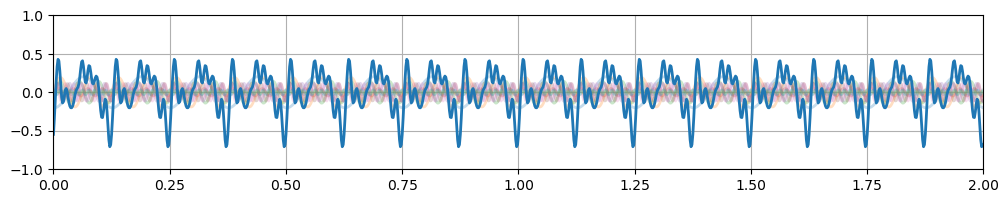

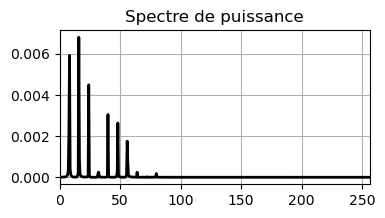

In [133]:
# harmoniques 

Fs = 512
N = 1024
n = np.arange(N) 
t = n/Fs
f1 = 8

# phases différentes
y = 0 
plt.figure(figsize=(12,2))
a = np.random.rand(10)
a[0] = 1
a /=a.sum()
for m in range(10):
    yn = a[m]*np.cos( (m+1)*t*2*np.pi*f1 + 2*np.pi*np.random.rand()) 
    y+=yn
    plt.plot(n/Fs, yn, lw=2, alpha=.25)

plt.plot(t, y, lw=2)    
plt.xlim((0,2))
plt.ylim((-1,1))
plt.grid()    
    
TF1 = np.fft.fft(y,Nfft)/N    
freq = np.arange(Nfft)*Fs/Nfft

plt.figure(figsize=(4,2))
plt.plot(freq,  np.abs(TF1)**2 , 'k', lw=2)
plt.title('Spectre de puissance')
plt.xlim((0,Fs//2))
plt.grid()

In [138]:
np.round((np.abs(TF1)**2)[:10],7)*1000000

array([ 5.6,  5.7,  6. ,  6.5,  7.3,  8.4, 10. , 12.3, 15.6, 20.6])